<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Learning/blob/main/NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this program


## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import dataset

In [2]:
df = pd.read_csv("adult.csv")

## Exploratory data analysis

In [3]:
df.shape

(32560, 15)

In [4]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
col_names = ['age','workclass','fnlwgt','education','education_name','martial_status','occupation','relationship','race','sex','capital_gain','capital loss','hours_per_week','native_country','income']
df.columns = col_names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_name',
       'martial_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education_name,martial_status,occupation,relationship,race,sex,capital_gain,capital loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_name  32560 non-null  int64 
 5   martial_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### finding categorical variables

In [8]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical varaibles \n'.format(len(categorical)))
print('The categorical variables are : \n\n ',categorical)

There are 9 categorical varaibles 

The categorical variables are : 

  ['workclass', 'education', 'martial_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [9]:
df[categorical].head()

,workclass,education,martial_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


There are 9 categorical variables and income is the target variable.

### Data Cleaning and pre-processing
checking missing values in categorical variables.

In [10]:
df[categorical].isnull().sum()

,0
workclass,0
education,0
martial_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0
income,0


In [11]:
for var in categorical:
  print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
martial_status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [12]:
for var in categorical:
  print(df[var].value_counts()/float(len(df)))

workclass
Private             0.697052
Self-emp-not-inc    0.078041
Local-gov           0.064281
?                   0.056388
State-gov           0.039834
Self-emp-inc        0.034275
Federal-gov         0.029484
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
education
HS-grad         0.322512
Some-college    0.223925
Bachelors       0.164435
Masters         0.052918
Assoc-voc       0.042445
11th            0.036087
Assoc-acdm      0.032770
10th            0.028655
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013299
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64
martial_status
Married-civ-spouse       0.459951
Never-married            0.328071
Divorced                 0.136456
Separated                0.031480
Widowed                  0.030498
Married-spouse-absent    0.012838
Married-AF-spouse        0.000706
Name: coun

In [13]:
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
df.workclass.value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [15]:
df['workclass'].replace(r'^\s*\?\s*$', np.nan, regex=True, inplace=True)

<ipython-input-15-bf65339a60b5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace(r'^\s*\?\s*$', np.nan, regex=True, inplace=True)


In [16]:
df.workclass.value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [17]:
df.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [18]:
df.occupation.value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3769
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [19]:
df['occupation'].replace(r'^\s*\?\s*$', np.nan, regex=True, inplace=True)

<ipython-input-19-6c326ff913bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].replace(r'^\s*\?\s*$', np.nan, regex=True, inplace=True)


In [20]:
df.occupation.value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3769
Sales,3650
Other-service,3295
Machine-op-inspct,2002
Transport-moving,1597
Handlers-cleaners,1370


In [21]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [22]:
df.native_country.value_counts()

,count
native_country,
United-States,29169
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [23]:
df['native_country'].replace(r'^\s*\?\s*$', np.nan, regex=True, inplace=True)

<ipython-input-23-576af6aac99c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['native_country'].replace(r'^\s*\?\s*$', np.nan, regex=True, inplace=True)


In [24]:
df[categorical].isnull().sum()

,0
workclass,1836
education,0
martial_status,0
occupation,1843
relationship,0
race,0
sex,0
native_country,583
income,0


Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [25]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
martial_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [26]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_name', 'capital_gain', 'capital loss', 'hours_per_week']


In [27]:
df[numerical].head()

,age,fnlwgt,education_name,capital_gain,capital loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [28]:
df[numerical].isnull().sum()

,0
age,0
fnlwgt,0
education_name,0
capital_gain,0
capital loss,0
hours_per_week,0


## Train and Test

In [29]:
X = df.drop(['income'], axis=1)
y=df['income']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Feature Engineering


In [31]:
X_train.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_name,int64
martial_status,object
occupation,object
relationship,object
race,object
sex,object


In [32]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [33]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_name',
 'capital_gain',
 'capital loss',
 'hours_per_week']

In [34]:
X_train[categorical].isnull().mean()

,0
workclass,0.057213
education,0.000000
martial_status,0.000000
occupation,0.057389
relationship,0.000000
race,0.000000
sex,0.000000
native_country,0.018252


In [35]:
for col in categorical:
  if X_train[col].isnull().mean()>0:
    print(col, (X_train[col].isnull().mean()))

workclass 0.057213057213057215
occupation 0.05738855738855739
native_country 0.018252018252018252


In [36]:
#impute missing categorical variables with most frequent values
for df2 in [X_train, X_test]:
    df2['workclass'] = df2['workclass'].fillna(X_train['workclass'].mode()[0])
    df2['occupation'] = df2['occupation'].fillna(X_train['occupation'].mode()[0])
    df2['native_country'] = df2['native_country'].fillna(X_train['native_country'].mode()[0])

In [37]:
X_train[categorical].isnull().sum()

,0
workclass,0
education,0
martial_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [38]:
X_test[categorical].isnull().sum()

,0
workclass,0
education,0
martial_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [39]:
X_train.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_name,0
martial_status,0
occupation,0
relationship,0
race,0
sex,0


In [40]:
X_test.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_name,0
martial_status,0
occupation,0
relationship,0
race,0
sex,0


In [41]:
categorical

['workclass',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [42]:
X_train[categorical].head()

,workclass,education,martial_status,occupation,relationship,race,sex,native_country
20721,Self-emp-inc,Some-college,Married-civ-spouse,Transport-moving,Husband,Black,Male,Haiti
32097,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25205,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Bachelors,Never-married,Farming-fishing,Not-in-family,White,Male,United-States
12367,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Male,India


In [43]:
!pip install category_encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [44]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'martial_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [45]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
20721,32,1,0,0,0,0,0,0,0,343872,...,0,0,0,0,0,0,0,0,0,0
32097,45,0,1,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25205,47,0,0,1,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,37,0,1,0,0,0,0,0,0,61778,...,0,0,0,0,0,0,0,0,0,0
12367,24,0,1,0,0,0,0,0,0,108495,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X_train.shape

(22792, 105)

In [47]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,40,1,0,0,0,0,0,0,0,193524,...,0,0,0,0,0,0,0,0,0,0
8950,46,0,1,0,0,0,0,0,0,188027,...,0,0,0,0,0,0,0,0,0,0
7838,33,0,1,0,0,0,0,0,0,202498,...,0,0,0,0,0,0,0,0,0,0
16505,21,0,1,0,0,0,0,0,0,184756,...,0,0,0,0,0,0,0,0,0,0
19140,59,0,1,0,0,0,0,0,0,106748,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X_train.shape

(22792, 105)

## Feature Scaling

In [49]:
cols = X_train.columns

In [50]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train = pd.DataFrame(X_train, columns = [cols])

In [52]:
X_test = pd.DataFrame(X_test, columns = [cols])

In [53]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.25,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.374471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.066379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.582591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.974966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.585881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model training

In [54]:
from sklearn.naive_bayes import GaussianNB


In [55]:
gnb = GaussianNB()

In [56]:
gnb.fit(X_train, y_train)

GaussianNB()

## Predict The Results

In [57]:
y_pred = gnb.predict(X_test)
y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

### Check Accuracy Score

In [58]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8164


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set

Now, I will compare the train-set and test-set accuracy to check for overfitting

In [59]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [60]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8089


In [61]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8089
Test set score: 0.8164


Both are very close to each other, so there is no sign of overfitting

In [62]:
y_test.value_counts()

,count
income,
<=50K,7454
>50K,2314


In [63]:
null_accuracy = (7454/(7454+2314))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7631


We can all see that null accuracy score is 0.7631. So, we can conclude that our Naive Bayes' model is doing a very good job!

In [64]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6105 1349]
 [ 444 1870]]

True Positives(TP) =  6105

True Negatives(TN) =  1870

False Positives(FP) =  1349

False Negatives(FN) =  444


<Axes: >

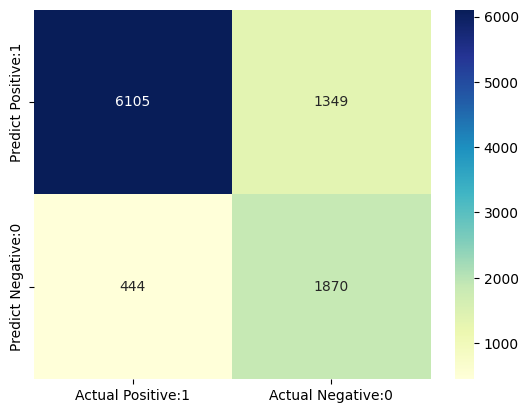

In [65]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.82      0.87      7454
        >50K       0.58      0.81      0.68      2314

    accuracy                           0.82      9768
   macro avg       0.76      0.81      0.77      9768
weighted avg       0.85      0.82      0.83      9768



Classification accuracy

In [67]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [68]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8164


Classification Error

In [69]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1836


Precision Score

In [70]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8190


Recall

In [71]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9322


True positive rate

In [72]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9322


False Posiive rate

In [73]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4191


## Calculaing Class Probabilities

In [74]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[5.65187154e-02, 9.43481285e-01],
       [9.99977898e-01, 2.21021023e-05],
       [9.99998716e-01, 1.28437690e-06],
       [9.99999999e-01, 1.14553388e-09],
       [9.99844406e-01, 1.55594116e-04],
       [1.45695734e-01, 8.54304266e-01],
       [9.99999934e-01, 6.55033777e-08],
       [9.99534858e-01, 4.65142119e-04],
       [9.85081734e-01, 1.49182659e-02],
       [9.99999992e-01, 8.45327133e-09]])

In [75]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.056519,9.434813e-01
1,0.999978,2.210210e-05
2,0.999999,1.284377e-06
3,1.000000,1.145534e-09
4,0.999844,1.555941e-04
5,0.145696,8.543043e-01
6,1.000000,6.550338e-08
7,0.999535,4.651421e-04
8,0.985082,1.491827e-02
9,1.000000,8.453271e-09


In [76]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([9.43481285e-01, 2.21021023e-05, 1.28437690e-06, 1.14553388e-09,
       1.55594116e-04, 8.54304266e-01, 6.55033777e-08, 4.65142119e-04,
       1.49182659e-02, 8.45327133e-09])

In [77]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

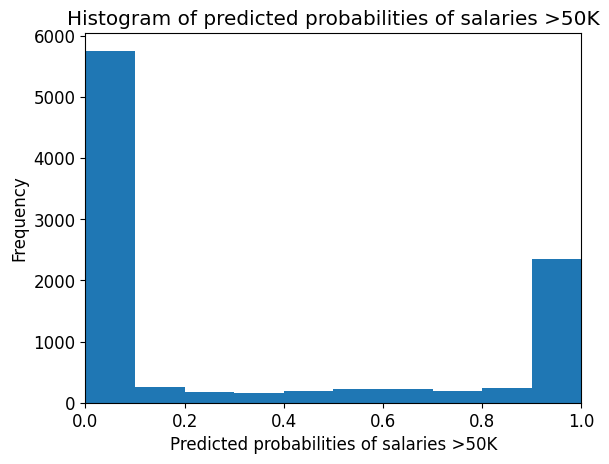

In [78]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

##  ROC - AUC

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


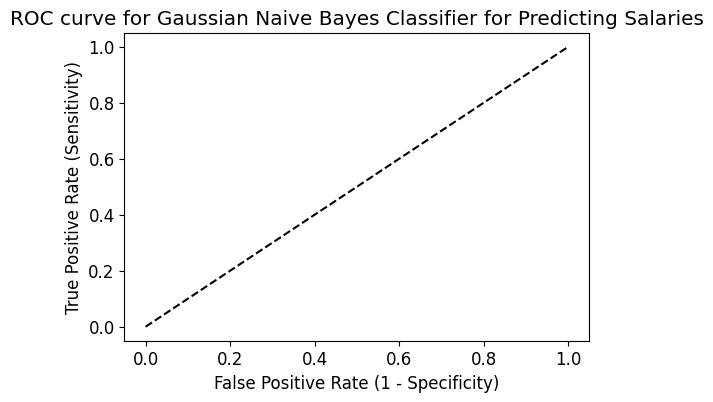

In [79]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [80]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8986


In [81]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8916


## k-Fold Cross Validation

In [82]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.81008772 0.81622807 0.80298376 0.8095656  0.78850373 0.8174638
 0.81790259 0.80342255 0.8174638  0.80254498]


We can summarize the cross-validation accuracy by calculating its mean.

In [83]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8086
